# Bayesian methods of Machine Learning. (Skoltech)

##         Home assignment 3. Normalizing flows 

Author: Kolesov Alexander

<img src="https://go2phystech.ru/wp-content/uploads/2021/02/skolteh.jpeg" width=800 height=200 />

### Important information

$\textbf{Deadline}$: 23:59:59, 14 November 2023 (Tuesday)\
$\textbf{Rules}$:
- You don't have to distribure materials of this homework, they belong to Skoltech.
- You don't have to use the help of other students. (otherwise, 0 points)
- You shouldn't postpone this homework.
- This HW costs 13 points 
- This HW is composed of 3 tasks with according points (1pts, 4 pts, 8pts).
- We created special telegram subgroup for this homework 1, where you can clarify some formal moments.
- You don't have to demonstrate your solution there or ask. (otherwise, 0 points)
- This HW might be appealed during the one week after the announcment of marks in offline format.


## Task 1. Jacobian of transformation (1 pt)

Consider the transformation from $x$ to $y$ where vector $x=\left[x_{1}, x_{2}\right]$  is repesented with $x_{1} \in \mathbb{R}^{m}$ and $x_{2} \in \mathbb{R}^{n}$, while $y=\left[y_{1}, y_{2}\right]$ with the same dimensionalities of $y_{1}, y_{2}$. The sign  $\odot$ means pointwise multiplication:
\begin{align}
y_{1} &=x_{1} \\
y_{2} &=\left(x_{2}+t\left(x_{1}\right)\right) \odot \exp \left(s\left(x_{2}\right)\right) .
\end{align}

Derive Jacobian of this transformation

In [1]:
# your latex code is here

$
J = (\begin{matrix} \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} \\ \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} \end{matrix})
= (\begin{matrix} I_m & 0 \\ A & B \end{matrix})
$

где
- **$I_m$** - m x m единичная матрица
- **$A$** - n x m матрица
- **$B$** - n x n матрица

$
A = \frac{\partial y_2}{\partial x_1} = exp(s(x_2)) \frac{\partial t(x_1)}{\partial x_1}
$

$
B = \frac{\partial y_2}{\partial x_2} = I_n exp(s(x_2)) + exp(s(x_2))\frac{\partial s(x_2)}{x_2}(x_2 + t(x_1))
$

## Task 2. Expressivity of normalizing flows(4 pts)

Let $\pi(\mathbf{x})$ is an absolutely continuous probability distribution supported everywhere on $\mathbb{R}^m$ (i.e. $\pi(\mathbf{x}) > 0$ for all $\mathbf{x} \in \mathbb{R}^m$). Additionally we suppose, that the pdf $\pi(\mathbf{x})$ is continuously differentiable on  $\mathbb{R}^m$.  Our ultimate goal is to show, that there exists diffeomorphism (invertible continuously differentiable map): 
$$ 
    \mathbf{u} = F(\mathbf{x}) \quad F : \mathbb{R}^m \rightarrow \mathbb{U}.
$$
Here $\mathbb{U} = [0, 1]^m$ is a hypercube, which turns $\pi(\mathbf{x})$ into uniform distribution $p(\mathbf{u}) = U[0, 1]^m$ on the hypercube $\mathbb{U}$ ($p(\mathbf{u}) = 1 \,,\, \mathbf{u} \in \mathbb{U}$). Here we have to think about openness and closeness of $\mathbb{U}$ for formal math correctness, but we omit it in this task. <sub><sup><i>Math correctness comment</i>: Strictly speaking, the diffeomorphism $F$ maps $\mathbb{R}^m$ to the open cube $\text{int}\left(\mathbb{U}\right) = (0, 1)^m$, sinse the reverse mapping $F^{-1} : \text{int}\left(\mathbb{U}\right) \rightarrow \mathbb{R}^m$ is continuous $\Rightarrow$ the preimage of the open set $\mathbb{R}^m$ with respect to $F^{-1}$ should be <b>open</b>: $(F^{-1})^{-1}(\mathbb{R}^m) = F(\mathbb{R}^m) = \text{an open set}$</sup></sub>

If such function exists, it means that **there exists normalizing flow model from base uniform distribution to any(!) target distribution.**

---------

1. Consider the autoregressive decomposition of $\pi(\mathbf{x})$:

    $$\pi(\mathbf{x}) = \prod\limits_{j = 1}^{m} \pi(x_j|\mathbf{x}_{1:j - 1}).$$

2. Treat each component $\pi(x_j|\mathbf{x}_{1:j - 1})$ in the decomposition above separately. Consider the transformations:

    $$\mathbf{x} \rightarrow u_j = F_j(x_j, \mathbf{x}_{1:j - 1}) = \int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j'.$$

   Here $F_j(x_j, \mathbf{x}_{1:j - 1})$ is the cumulative distribution function of $j$-th conditional $x_j$ (given $\mathbf{x}_{1:j - 1}$) Note, that $u_j \in [0, 1]$.

3. Define the transform $F : \mathbb{R}^m \rightarrow \mathbb{U}$ as follows:

    $$\mathbf{x} \rightarrow \mathbf{u} = \begin{bmatrix} F_1(x_1) \\ F_2(x_2,x_1) \\ \dots \\ F_m(x_m, \mathbf{x}_{1:m-1})\end{bmatrix}.$$
    
    Given the properties of $\pi$ ($\pi(\mathbf{x}) > 0$ and continuously differentiable) it is easy to show, that $F$ is continuously differentiable. We omit the details since they are just boring mathematical calculations.

    **Subproblem 2.1 (1pt):** Prove, that the function $F : \mathbb{R}^m \rightarrow \mathbb{U}$ is invertible. <sub><sup><i>Math correctness comment</i>: Strictly speaking, $F : \mathbb{R}^m \rightarrow \text{int}\left(\mathbb{U}\right)$ is invertible</sup></sub>

    **Subproblem 2.2 (1pt):** Prove, that $\det \mathbf{J}_F (\mathbf{x}) = \pi(x)$.

    **Subproblem 2.3 (1pt):** Prove, that $\mathbf{u}$ is a uniformly distributed ($p(\mathbf{u}) = U[0,1]^m)$.
    
    **Subproblem 2.4 (1pt):** Let $\pi(\mathbf{x})$ and $\mu(\mathbf{y})$ are absolutely continuous probability distributions supported everywhere on $\mathbb{R}^m$, whose pdfs are continuously differentiable. Prove that there exists a diffeomorphism $G : \mathbb{R}^m \rightarrow \mathbb{R}^m$ which turns $\pi$ into $\mu$, i.e.:

    $$\mathbf{y} = G(\mathbf{x}), \quad \text{where } \mathbf{x} \sim \pi(\mathbf{x}), \, \mathbf{y} \sim \mu(\mathbf{y}).$$

In [2]:
# your latex code is here

**2.1**

Функия $
F: x \rightarrow u =
\begin{bmatrix} u_1 \\ u_2 \\ \dots \\ u_m \end{bmatrix}=
\begin{bmatrix} F_1(x_1) \\ F_2(x_2,x_1) \\ \dots \\ F_m(x_m, \mathbf{x}_{1:m-1})\end{bmatrix}
$

Так как функция $\pi(x)$ непрерывно дифференцируема и всюду положительна, то функция распределения $F_j(x_j, x_{1:j-1})$ является возрастающей по $x_j$, инъективной и обратимой. Так можно найти обратную к $F_j$ функцию, зафиксировав все $x_{1:j-1}$ значения.

**2.2**

$
det J_F(x) =
det (\frac{\partial F_i}{\partial x_j}) =
det(\begin{matrix} \frac{\partial F_1}{\partial x_1} & ... & \frac{\partial F_1}{\partial x_m} \\ ... & ... & ... \\ \frac{\partial F_m}{\partial x_1} & ... & \frac{\partial F_m}{x_m} \end{matrix}) = 
det(\begin{matrix} \pi(x_1, x_{1:0}) & 0 &  ... & 0 \\ \frac{\partial F_2}{\partial x_1} & \pi(x_2, x_{1, 1}) & ... & 0 \\ ... & ... & ... & ... \\
\frac{\partial F_m}{x_1} & \frac{\partial F_m}{x_2} & ... & \pi(x_m, x_{1:m-1})\end{matrix}) = 
\prod_{i=1}^{i=m} \pi(x_j, x_{1:j-1}) = 
\pi(x)
$

**2.3**

$
u = (u_1, ..., u_m)^T
$

где каждая $u_j$ является функцией распределения, следовательно $\in [0, 1]$.

Более того, плотность $p_U(u) = p_X(x) * det(\frac{\partial F}{\partial x})^{-1} = \pi(x) (\pi(x))^{-1} = 1$. То есть $u \sim U[0,1]^{m}$ 

**2.4**

Так как существует диффеоморфизм $D_x: x \rightarrow u$ и $D_y: y \rightarrow u$, то $G$ можно представить в виде композиции $D_y^{-1}D_x$

## Task 3. REAL-NVP on MNIST dataset (8 pts)

During the seminar we were understanding REAL-NVP for 2d data, now you should implement this method for MNIST dataset. Please, write thios paper before this task. (paper is mentioned in notebook of the seminar 8).

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict
from tqdm.notebook import tqdm
from typing import Tuple

 
from torch import optim

In [4]:
from torchvision.utils import make_grid

### 3.1 utils

In [5]:
TICKS_FONT_SIZE = 12
LEGEND_FONT_SIZE = 12
LABEL_FONT_SIZE = 14
TITLE_FONT_SIZE = 16

In [6]:
def load_MNIST():
    train_data = torchvision.datasets.MNIST(root="./", train=True, download=True)
    test_data = torchvision.datasets.MNIST(root="./", train=False, download=True)
    train_data, test_data = train_data.data.numpy(), test_data.data.numpy()
    axis_index = len(train_data.shape)
    train_data = np.expand_dims(train_data, axis=axis_index)
    test_data = np.expand_dims(test_data, axis=axis_index)

    return train_data, test_data

In [7]:
def _load_dataset(name: str) :
    if name == "mnist":
        return load_MNIST()
    else:
        raise ValueError("The argument name must have the values 'mnist' or 'cifar10'")

In [8]:
def load_dataset(
    name: str, flatten: bool = False, binarize: bool = True
)  :

    train_data, test_data = _load_dataset(name)

    train_data = train_data.astype("float32")
    test_data = test_data.astype("float32")

    if binarize:
        train_data = (train_data > 128).astype("float32")
        test_data = (test_data > 128).astype("float32")
    else:
        train_data = train_data / 255.0
        test_data = test_data / 255.0

    train_data = np.transpose(train_data, (0, 3, 1, 2))
    test_data = np.transpose(test_data, (0, 3, 1, 2))

    if flatten:
        train_data = train_data.reshape(len(train_data.shape[0]), -1)
        test_data = test_data.reshape(len(train_data.shape[0]), -1)

    return train_data, test_data

In [9]:
def show_samples(
    samples,
    title,
    figsize=None,
    nrow=None,
) -> None:
    
    if isinstance(samples, np.ndarray):
        samples = torch.FloatTensor(samples)
    if nrow is None:
        nrow = int(np.sqrt(len(samples)))
    grid_samples = make_grid(samples, nrow=nrow)

    grid_img = grid_samples.permute(1, 2, 0)
    if figsize is None:
        figsize = (6, 6)
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=TITLE_FONT_SIZE)
    plt.imshow(grid_img)
    plt.axis("off")
    plt.show()


def visualize_images(data: np.ndarray, title: str) -> None:
    idxs = np.random.choice(len(data), replace=False, size=(100,))
    images = data[idxs]
    show_samples(images, title)

### 3.2 data 

100%|██████████| 9912422/9912422 [00:00<00:00, 105144231.00it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 48203618.71it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26519818.84it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8516105.84it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



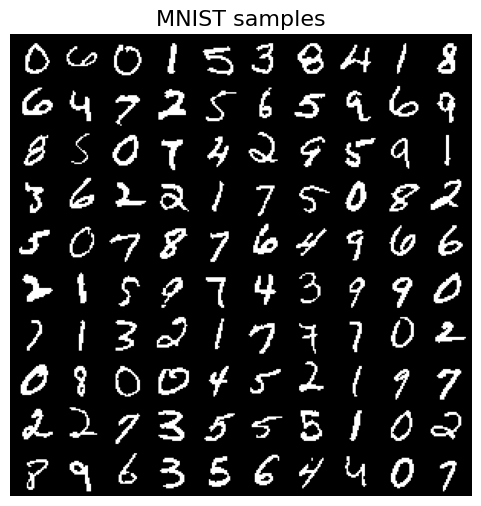

In [10]:
train_data, test_data = load_dataset('mnist', flatten=False, binarize=True)
visualize_images(train_data, 'MNIST samples')

In [11]:
train_data.shape, test_data.shape

((60000, 1, 28, 28), (10000, 1, 28, 28))

### 3.3 models

In this task for the neural networks $s(\cdot)$ and $t(\cdot)$ we will use the ResNet-like network. The model will consist stack of Residual blocks:
$$
    \mathbf{y} = \mathbf{x} + f(\mathbf{x}).
$$

In [12]:
class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(dim, dim, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=1)
        )

    def forward(self, x):
        return x + self.block(x)


class SimpleResnet(nn.Module):
    def __init__(self, in_channels, out_channels, n_filters, n_blocks):
        super().__init__()
        layers = [
            nn.Conv2d(in_channels, n_filters, kernel_size=3, padding=1),
            nn.ReLU()
        ]
        for _ in range(n_blocks):
            layers.append(ResnetBlock(n_filters))
        layers.extend([
            nn.ReLU(),
            nn.Conv2d(n_filters, out_channels, kernel_size=3, padding=1)
        ])
        self.resnet = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)

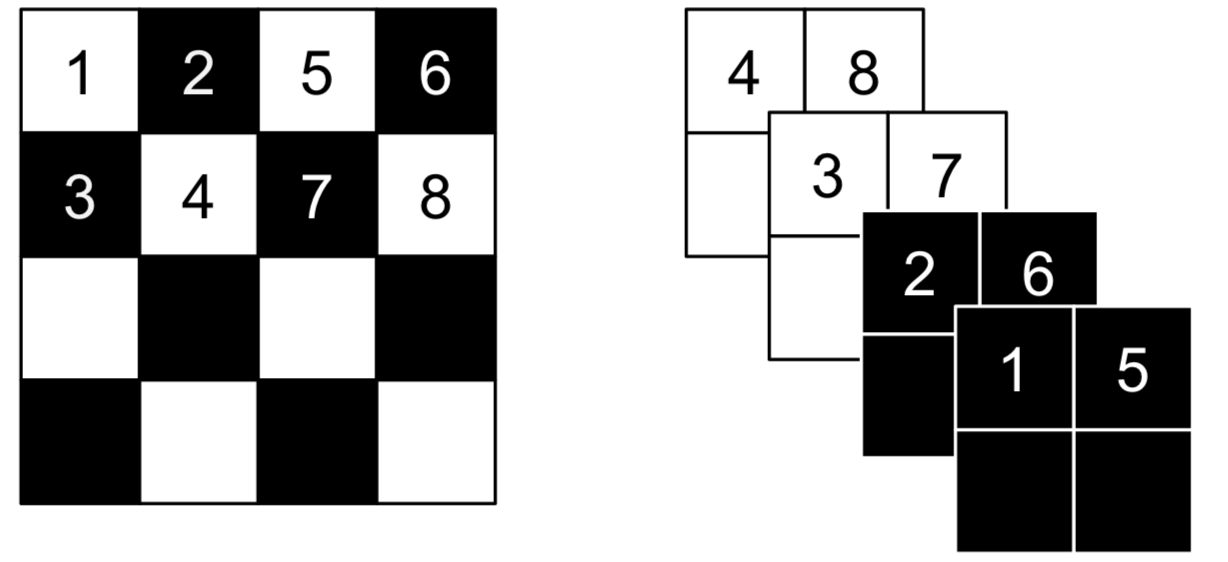

## 3.4 Coupling layer  for splitting(3  pts)

Firstly, let implement checkerboard splitting. In this task, you should add description for the follwoing functions:

- init (1 pt)
- build mask (1 pt)
- forward (1 pt)

In [13]:
class AffineCheckerboardCouplingLayer(nn.Module):
    def __init__(self, parity_type, input_shape, in_channels=3, n_filters=32, n_blocks=4):
        """
        Initilize model and set parameters.
        Notice, that we need to have s() and t() as output of our model, that's the reason why we state out_channels = in_channels * 2
        
        """
        assert isinstance(parity_type, bool)
        super().__init__()
        self.input_shape = input_shape
        self.parity_type = parity_type
        self.mask = self.build_mask()
        self.scale = nn.Parameter(
            torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)

        # ====
        # your code
        # define resnet that will output s() and t() (resnet)
        #  
        # ====
        
        self.model = SimpleResnet(in_channels = in_channels, out_channels = in_channels * 2, n_filters = n_filters, n_blocks = n_blocks)

    def build_mask(self):
        """
        Creating checkboard mask.
        
        - If parity_type == True, the top left corner will be 1.0
        - If parity_type == False, the top left corner will be 0.0
        
        """
        # ====
        # your code
        # return checkerboard mask
        # if parity_type == True, the top left corner will be 1.0
        # if parity_type == False, the top left corner will be 0.0
    
        mask = np.zeros(self.input_shape)
        if self.parity_type:
            mask[0::2, 0::2] = 1
            mask[1::2, 1::2] = 1
        else:
            mask[0::2, 1::2] = 1
            mask[1::2, 0::2] = 1
        
        mask = mask[None, None]
        # ====
        assert mask.shape[1:] == (1, *self.input_shape)
        return torch.tensor(mask.astype('float32')).cuda()

    def forward(self, x, invert=False):
        """
        Realisation of forward or inverse transform
        
        """
        assert isinstance(invert, bool)
        batch_size = x.shape[0]
        n_channels = x.shape[1]
        mask = self.mask.repeat(batch_size, 1, 1, 1)

        # ====
        # your code
        # 1) mask tensor x
        # 2) apply resnet to masked x
        # 3) split resnet output to get s and t
        s, t = self.model(mask * x).chunk(2, 1)
        
        # ====

        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        t = t * (1.0 - mask)
        s = s * (1.0 - mask)

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform
        if invert:
            x = mask * x + (1.0 - mask) * (x - t) * torch.exp(-s)
        else:
            x = mask * x + (1.0 - mask) * (x * torch.exp(s) + t)

        # ====
        return x, s
        

### 3.5  chennelwise for splitting ( 2 pts)

Secodly, let implement channelwise splitting. In this subtask, you should add description for the follwoing functions:

- init (1 pt)
- forward (1 pt)

In [14]:
class AffineChannelCouplingLayer(nn.Module):
    def __init__(self, parity_type, in_channels=6, n_filters=32, n_blocks=4):
        """
        Initilize model and set parameters.
        Notice, that we need to have s() and t() as output of our model, that's the reason why we state out_channels = in_channels * 2
        
        """
        assert isinstance(parity_type, bool)
        super().__init__()
        self.parity_type = parity_type
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        # ====
        # your code
        # define resnet that will output s() and t()
        
        self.model = SimpleResnet(in_channels = in_channels, out_channels = in_channels * 2, n_filters = n_filters, n_blocks = n_blocks)
        
        # ====

    def forward(self, x, invert=False):
        n_channels = x.shape[1]
        
        # ====
        # your code
        # 1) split x to two equal parts by channel dimension (dim=1)
        # 2) apply resnet to masked x
        # 3) split resnet output to get s and t
        
        z, z_split = x.chunk(2, 1)
        s, t = self.model(z).chunk(2, 1)
        
        # ====

        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        
        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform
        
        if invert:
            z_split = (z_split - t) * torch.exp(-s)
        else:
            z_split = z_split * torch.exp(s) + t
        
        # ====

        # look carefully at this piece of code
        if self.parity_type:
            return torch.cat([z, z_split], dim=1), torch.cat([s, torch.zeros_like(s)], dim=1)
        else:
            return torch.cat([z_split, z], dim=1), torch.cat([torch.zeros_like(s), s], dim=1)


### 3.6 ActNormlayer

We will use the following normalization layer for more stable training. Look carefully at the class below (do not chage it).

In [15]:
class ActNormLayer(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x, invert=False):
        if invert:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = - torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(1, self.n_channels, 1, 1))
                self.initialized = True
                result = x * torch.exp(self.log_scale) + self.shift
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

Our data is discrete and binary. The normalizing flow model works with continuous data (it is a requirement of CoV theorem).

Therefore, we have to convert our discrete data to continuous one. This process is called dequantization. We will address it later in course.

To dequantize the discrete variable $x \in \{0, 1, \dots, K - 1\}$ we add uniform noise to it:
$$
    y = x + u, \quad u \sim \text{Uniform}[0, 1].
$$

Then random variable $y \in [0, K]$ will be continuous and in fact similar to $x$.

Let implement simple function for such dequantization.

In [16]:
def dequantize(x, nbins=256):
    return (x * (nbins - 1) + torch.distributions.Uniform(0.0, 1.0).sample(x.shape).to(x.device)) / nbins

The second issue that we will address here is the boundedness of the image domain. It is more natural for the model to fit the data from the range $(-\infty, +\infty)$. 

The most natural way to convert $(-\infty, +\infty)$ range to the $[0, 1]$ is to apply sigmoid function. But here we need the inverse transform from [0, 1] range (it is normalized dequantized images) to $(-\infty, +\infty)$. So we need to apply inverse sigmoid function. This function is called logit:
$$
    \text{logit}(x) = \log \left( \frac{x}{1 - x} \right) = \log (x) - \log (1 - x).
$$

The last note here is the stability of this transform. To make it stable the common practice is to convert [0, 1] range to the $[\alpha, 1 - \alpha]$ firstly:
$$
    \text{logit}(x) = \log (y) - \log (1 - y), \quad \text{where } y = \alpha + (1 - 2 * \alpha) * x.
$$

Also we need the logarithm of the Jacobian' determinant for this transform. We implement this for you, but we really encourage you to check that the formula in the code is correct for better understanding.

### 3.7 LogitTransform (1 pt)

In this task, you should add description for function 

- forward

In [17]:
class LogitTransform(nn.Module):
    def __init__(self, alpha=0.05, dequantize=True, nbins=256):
        super().__init__()
        self.alpha = alpha
        self.dequantize = dequantize
        self.nbins = nbins

    def forward(self, x, invert=False):
        if invert:  
            log_det = - x - 2 * F.softplus(-x) - torch.log(torch.tensor(1 - 2 *  self.alpha))
            x = (torch.sigmoid(x) - self.alpha) / (1 - 2 * self.alpha)
        else:
            # dequantization
            if self.dequantize:
                x = dequantize(x, nbins=self.nbins)

            # ====
            # your code
            # 1) scale the data to [alpha, 1 - alpha range] (save the result to x_scaled)
            # 2) apply logit operation that described above (save the result to x)
            x_scaled = self.alpha + (1 - 2 * self.alpha) * x
            x = torch.log(x_scaled) - torch.log(1 - x_scaled)
            # ====

            # look carefully at this expression, try to understand this formula
            log_det = - torch.log(x_scaled) - torch.log(1.0 - x_scaled) + torch.log(torch.tensor(1 - 2 * self.alpha))
        return x, log_det



Now it is time to define the final model.

The model will consist of several blocks:

1. Logit Transform (to convert the data to $(-\infty, \infty)$ range).
2. Stack of checkerboard coupling layers.
3. Squeeze operation (convert tensor $[B, C, H, W]$ to $[B, 4 * C, H / 2, W / 2]$).
4. Stack of channelwise coupling layers
5. Unsqueeze operation (convert tensor $[B, C, H, W]$ to $[B, C / 4, 2 * H, 2 * W]$).
2. Stack of checkerboard coupling layers.

### 3.8 Real-nvp model (2 pt)

In this task, you should add description for functions:

- init (1 pt)
- log_prob (2 pts)

In [18]:
class RealNVP(nn.Module):
    def __init__(self, input_shape, n_channels, n_filters, n_blocks, nbins=256):
        super().__init__()
        self.input_shape = input_shape
        self.n_channels = n_channels
        self.nbins = nbins

        self.prior = torch.distributions.Normal(torch.tensor(0.).cuda(), torch.tensor(1.).cuda())
        self.logit_transform = LogitTransform(nbins=nbins, dequantize=True)

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        
        self.transforms1 = nn.Sequential(
            AffineCheckerboardCouplingLayer(False, input_shape, n_channels, n_filters, n_blocks),
            ActNormLayer(n_channels),
            AffineCheckerboardCouplingLayer(True, input_shape, n_channels, n_filters, n_blocks),
            ActNormLayer(n_channels),
        )
        # ====

        # ====
        # your code
        # define stack of channel coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        self.transforms2 = nn.Sequential(
            AffineChannelCouplingLayer(False, 2 * n_channels, n_filters, n_blocks),
            ActNormLayer(4 * n_channels),
            AffineChannelCouplingLayer(True, 2 * n_channels, n_filters, n_blocks),
            ActNormLayer(4 * n_channels),
        )
        # ====

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        self.transforms3 = nn.Sequential(
            AffineCheckerboardCouplingLayer(False, input_shape, n_channels, n_filters, n_blocks),
            ActNormLayer(n_channels),
            AffineCheckerboardCouplingLayer(True, input_shape, n_channels, n_filters, n_blocks),
            ActNormLayer(n_channels),
        )
        # ====
        
    def squeeze(self, x):
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def undo_squeeze(self, x):
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x

    def forward(self, x, invert=False):
        z = x
        log_det = torch.zeros_like(x)
        if invert:
            for op in reversed(self.transforms3):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in reversed(self.transforms2):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in reversed(self.transforms1):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, delta_log_det = self.logit_transform(z, invert=True)
            log_det += delta_log_det
        else:
            z, delta_log_det = self.logit_transform(z)
            log_det += delta_log_det
            for op in self.transforms1:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in self.transforms2:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in self.transforms3:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det

        return z, log_det

    def log_prob(self, x):
        # pass
        # ====
        # your code
        # 1) make forward pass with right inverse flag
        # 2) sum log_det with log of base distribution (log p(z))
        # 3) we will get tensor of shape [batch_size, 3, H, W] - sum it over the the last 3 dimensions
        z, log_det = self.forward(x, invert=False)
        return (log_det + self.prior.log_prob(z)).sum(dim = (-1, -2, -3))
        # ====

    def loss(self, x):
        return {'nll_loss': -self.log_prob(x).mean()}

    def sample(self, num_samples):
        # Look carefully at this piece of code (do not change)
        z = self.prior.sample([num_samples, self.n_channels, *self.input_shape])
        samples = self.forward(z, invert=True)[0]
        samples = samples.cpu().detach().numpy()
        samples = np.floor(np.clip(samples * self.nbins, 0.0, self.nbins - 1)) / (self.nbins - 1)
        return samples

## 3.9 Training

In [19]:
def train_epoch(
    model: object,
    train_loader: object,
    optimizer: object,
    use_cuda: bool,
    loss_key: str = "total",
) -> defaultdict:
    model.train()

    stats = defaultdict(list)
    for x in train_loader:
        if use_cuda:
            x = x.cuda()
        losses = model.loss(x)
        optimizer.zero_grad()
        losses[loss_key].backward()
        optimizer.step()

        for k, v in losses.items():
            stats[k].append(v.item())

    return stats


def eval_model(model: object, data_loader: object, use_cuda: bool) -> defaultdict:
    model.eval()
    stats = defaultdict(float)
    with torch.no_grad():
        for x in data_loader:
            if use_cuda:
                x = x.cuda()
            losses = model.loss(x)
            for k, v in losses.items():
                stats[k] += v.item() * x.shape[0]

        for k in stats.keys():
            stats[k] /= len(data_loader.dataset)
    return stats


def train_model(
    model: object,
    train_loader: object,
    test_loader: object,
    epochs: int,
    lr: float,
    use_tqdm: bool = False,
    use_cuda: bool = False,
    loss_key: str = "total_loss",
) -> Tuple[dict, dict]:
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = defaultdict(list)
    test_losses = defaultdict(list)
    forrange = tqdm(range(epochs)) if use_tqdm else range(epochs)
    if use_cuda:
        model = model.cuda()

    for epoch in forrange:
        model.train()
        train_loss = train_epoch(model, train_loader, optimizer, use_cuda, loss_key)
        test_loss = eval_model(model, test_loader, use_cuda)

        for k in train_loss.keys():
            train_losses[k].extend(train_loss[k])
            test_losses[k].append(test_loss[k])
    return dict(train_losses), dict(test_losses)

In [20]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 256    # any adequate value
LR =         5e-4 # <= 1e-3
EPOCHS =     12     # <= 20
N_FILTERS =  64     # < 128
N_BLOCKS  =  6     # < 8
USE_CUDA  =  True
# ====

loader_args = dict(batch_size=BATCH_SIZE, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_data, **loader_args)
test_loader = torch.utils.data.DataLoader(test_data, **loader_args)

# model
model = RealNVP(input_shape=(28, 28), n_channels=1, n_filters=N_FILTERS, n_blocks=N_BLOCKS, nbins=2)

# train
train_losses, test_losses = train_model(
    model, train_loader, test_loader, epochs=EPOCHS, lr=LR, loss_key='nll_loss', use_cuda=USE_CUDA, use_tqdm=True
)

  0%|          | 0/12 [00:00<?, ?it/s]

In [21]:
def plot_training_curves(train_losses, test_losses, logscale_y=False, logscale_x=False):
    n_train = len(train_losses[list(train_losses.keys())[0]])
    n_test = len(test_losses[list(train_losses.keys())[0]])
    x_train = np.linspace(0, n_test - 1, n_train)
    x_test = np.arange(n_test)

    plt.figure()
    for key, value in train_losses.items():
        plt.plot(x_train, value, label=key + '_train')

    for key, value in test_losses.items():
        plt.plot(x_test, value, label=key + '_test')

    if logscale_y:
        plt.semilogy()
    
    if logscale_x:
        plt.semilogx()

    plt.legend(fontsize=LEGEND_FONT_SIZE)
    plt.xlabel('Epoch', fontsize=LABEL_FONT_SIZE)
    plt.ylabel('Loss', fontsize=LABEL_FONT_SIZE)
    plt.xticks(fontsize=TICKS_FONT_SIZE)
    plt.yticks(fontsize=TICKS_FONT_SIZE)
    plt.grid()
    plt.show()


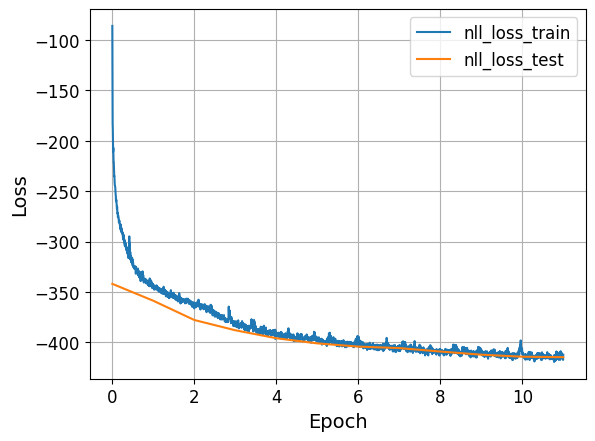

In [22]:
plot_training_curves(train_losses, test_losses)

### 3.10 Inference

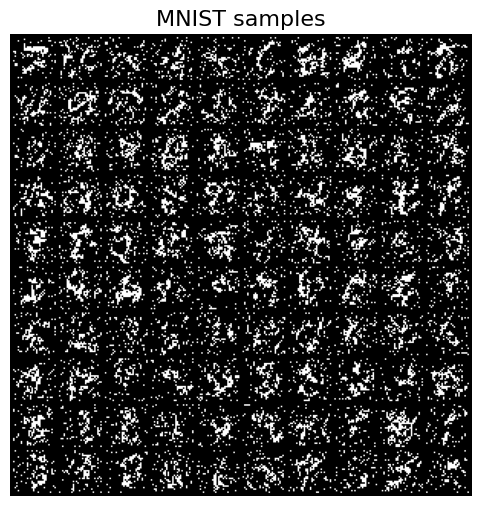

In [23]:
samples = model.sample(100)
show_samples(samples, 'MNIST samples')